# 📊 Machine Learning Project

This project is part of the Artificial Intelligence course at Thomas More University and aims to predict whether a student will be placed (employed) through campus recruitment based on their academic performance, background, and other features.

The prediction task is a **binary classification** problem: predicting the `status` of placement (`Placed` or `Not Placed`). As an optional bonus, we also explore **regression modeling** to predict the student's starting `salary`, but only for those who are placed.

The notebook follows a typical Machine Learning pipeline:
1. **Exploratory Data Analysis (EDA)** – to understand patterns in the dataset.
2. **Preprocessing** – to prepare the data for modeling.
3. **Modeling** – starting with a Random Forest as a baseline, followed by other models.
4. **Evaluation** – using accuracy and a confusion matrix.
5. **Kaggle Submission** – final predictions are saved in the required format.
6. **GenAI Section** – explanation of how AI tools were used to assist in this project.

The goal is not only to achieve strong predictive performance, but also to show a deep understanding of the reasoning behind each step.


## 🔧 1. Importing Libraries

In this section, we import all the necessary Python libraries for data analysis, visualization, preprocessing, modeling, and evaluation. These libraries provide the essential tools to build, train, and evaluate machine learning models effectively.


In [1]:
# 📦 Import Libraries

# --- Data manipulation and analysis ---
import pandas as pd  # For working with data in DataFrames (loading, cleaning, etc.)
import numpy as np  # For numerical operations and array handling
# These foundational libraries are essential for organizing and transforming datasets efficiently.

# --- Data visualization ---
import matplotlib.pyplot as plt  # For basic plotting (line, bar, scatter, etc.)
import seaborn as sns  # For advanced and prettier statistical plots (heatmaps, histograms, etc.)
# Visualization libraries help explore data patterns and model results through clear, informative plots.

# --- Preprocessing ---
from sklearn.preprocessing import StandardScaler  # For scaling numerical features (standardization)
# StandardScaler is used to standardize features, ensuring models sensitive to feature scales perform better.

# --- Model selection and tuning ---
from sklearn.model_selection import (
    train_test_split,  # To split the dataset into training and testing sets
    RandomizedSearchCV,  # For random hyperparameter search (faster tuning)
    GridSearchCV  # For exhaustive hyperparameter tuning using a grid
)
# These tools allow proper model validation and fine-tuning of hyperparameters to enhance performance.

# --- Classification models ---
from sklearn.ensemble import RandomForestClassifier  # Ensemble model using multiple decision trees
from sklearn.linear_model import LogisticRegression  # Linear model for binary classification
from sklearn.tree import DecisionTreeClassifier  # Simple decision tree classifier
from sklearn.svm import SVC  # Support Vector Machine classifier
from xgboost import XGBClassifier  # eXtreme Gradient Boosting model (high-performing ensemble method)
# A variety of classification models are imported to provide flexibility depending on the dataset and task.

# --- Evaluation metrics ---
from sklearn.metrics import (
    accuracy_score,  # To calculate accuracy of model predictions
    classification_report,  # For detailed precision, recall, F1-score report
    confusion_matrix  # To evaluate true/false positives/negatives
)
# Evaluation tools assess model performance comprehensively and guide model improvement.


## 📥 2. Loading the Dataset

In this step, we load the training and test datasets using `pandas`. We also display basic information to understand the structure of the data, including the number of entries, column types, and missing values. Finally, we preview the first few rows of the training dataset.


In [2]:
# 📂 Load the training and test datasets
train_df = pd.read_csv("train_campusrecruit.csv")  # Load training dataset into a pandas DataFrame
test_df = pd.read_csv("test_campusrecruit.csv")    # Load test dataset into another pandas DataFrame

# 🔍 Display dataset info to understand structure and missing values
print("Train Data Info:")
train_df.info()  # Shows data types, non-null counts, and memory usage for training data

print("\nTest Data Info:")
test_df.info()  # Shows the same info for test data to check consistency and detect issues

# 👁️ Preview the first few rows of the training dataset
train_df.head()  # Helps visually inspect the data format, columns, and sample values


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1000 non-null   int64  
 1   gender          700 non-null    object 
 2   ssc_p           700 non-null    float64
 3   ssc_b           700 non-null    object 
 4   hsc_p           700 non-null    float64
 5   hsc_b           700 non-null    object 
 6   hsc_s           700 non-null    object 
 7   degree_p        700 non-null    float64
 8   degree_t        700 non-null    object 
 9   workex          700 non-null    object 
 10  etest_p         700 non-null    float64
 11  specialisation  700 non-null    object 
 12  mba_p           700 non-null    float64
 13  status          700 non-null    object 
 14  salary          1000 non-null   float64
dtypes: float64(6), int64(1), object(8)
memory usage: 117.3+ KB

Test Data Info:
<class 'pandas.core.frame.DataF

,id,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,61,M,61.84,Others,57.93,Others,Science,68.03,Sci&Tech,No,60.60,Mkt&HR,55.10,Not Placed,0.0
1,273,M,63.06,Central,75.61,Central,Commerce,63.40,Comm&Mgmt,Yes,62.33,Mkt&HR,54.69,Placed,424507.0
2,489,M,76.34,Central,63.37,Central,Science,71.33,Sci&Tech,No,53.98,Mkt&HR,53.03,Placed,200000.0
3,721,M,54.12,Others,65.47,Others,Commerce,73.83,Comm&Mgmt,Yes,62.09,Mkt&Fin,58.87,Not Placed,0.0
4,95,M,63.12,Others,68.94,Central,Commerce,66.08,Comm&Mgmt,Yes,71.99,Mkt&HR,67.01,Placed,327148.0


## 📊 3. Exploratory Data Analysis (EDA)

In this section, we analyze the training dataset to uncover key patterns and insights. This includes:
- Checking for missing values
- Understanding the distribution of the target variable (`status`)
- Exploring numerical feature distributions
- Checking unique values in categorical features
- Visualizing feature correlations


Missing Values in Training Set:
id                  0
gender            300
ssc_p             300
ssc_b             300
hsc_p             300
hsc_b             300
hsc_s             300
degree_p          300
degree_t          300
workex            300
etest_p           300
specialisation    300
mba_p             300
status            300
salary              0
dtype: int64


/var/folders/f0/_tj0pt9x4031t82dhd03xkz00000gn/T/ipykernel_34255/3943586494.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x="status", palette="coolwarm")  # Bar plot showing count of each class in 'status'


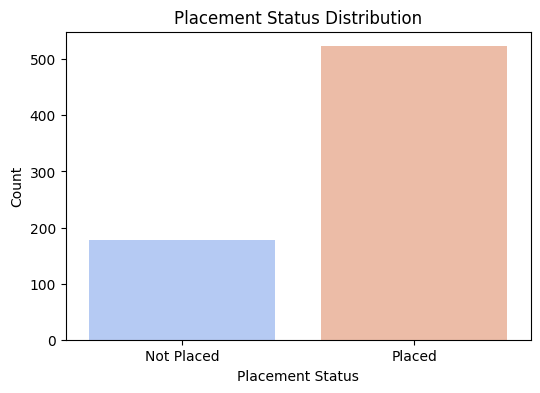

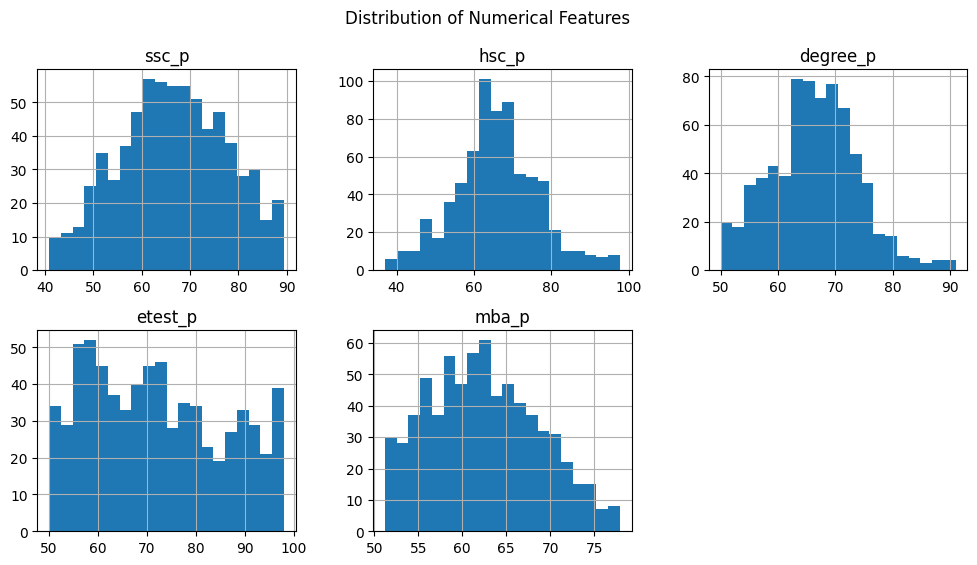

gender unique values: ['M' 'F' nan]
ssc_b unique values: ['Others' 'Central' nan]
hsc_b unique values: ['Others' 'Central' nan]
hsc_s unique values: ['Science' 'Commerce' 'Arts' nan]
degree_t unique values: ['Sci&Tech' 'Comm&Mgmt' 'Others' nan]
workex unique values: ['No' 'Yes' nan]
specialisation unique values: ['Mkt&HR' 'Mkt&Fin' nan]

Class Distribution:
status
Placed        523
Not Placed    177
Name: count, dtype: int64


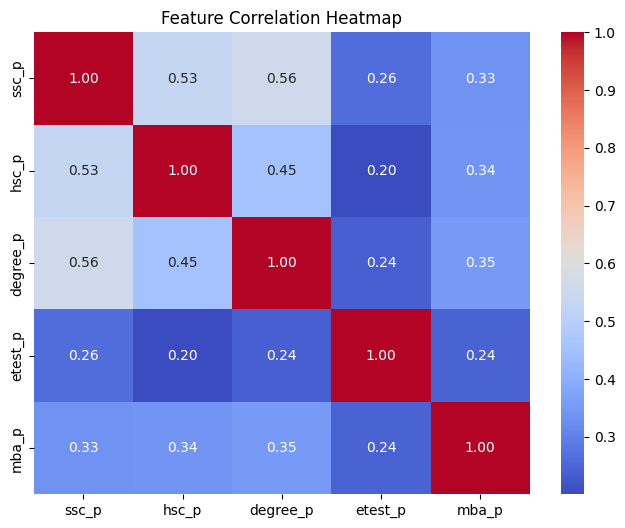

In [3]:
# 🔎 Check for missing values in the training set
print("Missing Values in Training Set:")
print(train_df.isnull().sum())  # Identifies how many missing (NaN) values are present in each column

# 🔠 Define list of categorical features for later analysis and encoding
cat_features = ["gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation"]

# 📊 Plot class distribution for the target variable
plt.figure(figsize=(6, 4))  # Set the size of the figure
sns.countplot(data=train_df, x="status", palette="coolwarm")  # Bar plot showing count of each class in 'status'
plt.title("Placement Status Distribution")  # Title for the plot
plt.xlabel("Placement Status")  # Label for x-axis
plt.ylabel("Count")  # Label for y-axis
plt.show()  # Display the plot

# 📈 Plot distribution of numerical features
num_features = ["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p"]  # List of numerical columns to analyze
train_df[num_features].hist(figsize=(12, 6), bins=20, layout=(2, 3))  # Plot histograms for all numeric columns
plt.suptitle("Distribution of Numerical Features")  # Title for the group of histograms
plt.show()  # Show the histograms

# 🔍 Show unique values in categorical features
for col in cat_features:
    print(f"{col} unique values: {train_df[col].unique()}")  # Helps understand what categories exist for each column

# ⚖️ Check class balance of the target variable
print("\nClass Distribution:")
print(train_df["status"].value_counts())  # Prints how many samples belong to each class (Placed / Not Placed)

# 🔥 Correlation heatmap of numerical features (excluding 'salary' due to NaNs)
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(train_df[num_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")  # Show pairwise correlations
plt.title("Feature Correlation Heatmap")  # Title for the heatmap
plt.show()  # Display the heatmap


### 🧠 Key Insights from EDA

- **Missing Values:** Most columns have 300 missing entries, suggesting only part of the dataset (likely the first 300 rows) contains complete records for training. These missing values will be handled during preprocessing.
  
- **Placement Status:** The target variable `status` is imbalanced, with significantly more students placed (`523`) than not placed (`177`). This class imbalance might affect model performance, so we'll keep it in mind.

- **Numerical Feature Distributions:** Most numerical features such as `ssc_p`, `hsc_p`, and `degree_p` appear to be normally distributed, while `etest_p` is more uniform. No extreme outliers are observed visually, but further checks can be done during preprocessing.

- **Categorical Features:** Several features (like `gender`, `ssc_b`, `hsc_s`, etc.) contain missing values and will need to be encoded. All of them have a limited set of unique values suitable for one-hot or label encoding.

- **Correlation Heatmap:** There's moderate positive correlation between features like `ssc_p`, `hsc_p`, and `degree_p`, but no multicollinearity issues. These features seem relevant to the prediction target and will be kept for modeling.


## 🧼 4. Data Preprocessing

In this step, we prepare the data for modeling by handling missing values, encoding categorical variables, scaling numerical features, and engineering new features to improve model performance.

### Key preprocessing steps:
- **Handling Missing Values**:
  - Numerical columns are filled with their median value.
  - Categorical columns are filled with the most frequent value (mode).
- **Feature Engineering**:
  - Two interaction features are created: `ssc_p * hsc_p` and `degree_p * mba_p`.
  - Binning of `ssc_p` and `hsc_p` into qualitative categories: Low, Average, Good, Excellent.
- **Encoding**:
  - One-hot encoding is applied to the binned categorical columns.
- **Scaling**:
  - All numerical features are standardized using `StandardScaler`.

This ensures the dataset is clean, consistent, and ready for training various machine learning models.


In [4]:
# 1️⃣ Handling Missing Values and Feature Preparation

# 🧮 Define lists of numerical and categorical features
num_features = ["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p"]  # These are continuous numeric features
cat_features = ["gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation"]  # These are discrete/categorical features

# 🩹 Fill missing numerical values with the median (robust to outliers)
for col in num_features:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna(train_df[col].median())  # Replace NaNs with column median

# 🧼 Fill missing categorical values with the most frequent category (mode)
for col in cat_features:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna(train_df[col].mode()[0])  # Replace NaNs with mode value

# 🔁 Convert boolean columns (if any) to integers (0 and 1) for modeling
for col in train_df.select_dtypes(include=['bool']).columns:
    train_df[col] = train_df[col].astype(int)  # Ensures compatibility with ML models

# 2️⃣ Create interaction features (multiplying related pairs to capture nonlinear relationships)
train_df["ssc_hsc_interaction"] = train_df["ssc_p"] * train_df["hsc_p"]  # Combine secondary and higher secondary performance
train_df["degree_mba_interaction"] = train_df["degree_p"] * train_df["mba_p"]  # Combine degree and MBA performance

# 3️⃣ Binning numerical scores into labeled categories to capture performance tiers
train_df["ssc_p_bin"] = pd.cut(train_df["ssc_p"], bins=[0, 40, 60, 80, 100], labels=["Low", "Average", "Good", "Excellent"])  # Secondary % bins
train_df["hsc_p_bin"] = pd.cut(train_df["hsc_p"], bins=[0, 40, 60, 80, 100], labels=["Low", "Average", "Good", "Excellent"])  # Higher Secondary % bins

# 🔡 One-hot encode the newly created categorical bins and drop the first category to avoid dummy variable trap
train_df = pd.get_dummies(train_df, columns=["ssc_p_bin", "hsc_p_bin"], drop_first=True)

# 4️⃣ Feature Scaling: standardize numerical features to mean=0 and std=1 for uniformity
scaler = StandardScaler()  # Instantiate the scaler
train_df[num_features] = scaler.fit_transform(train_df[num_features])  # Scale all numerical columns

# ✅ Preprocessing Complete
print("✅ Preprocessing Done!")

# 👁️ Preview the first few rows of the processed dataset
print("Preprocessed Data Sample:")
print(train_df.head())


✅ Preprocessing Done!
Preprocessed Data Sample:
    id gender     ssc_p    ssc_b     hsc_p    hsc_b     hsc_s  degree_p  \
0   61      M -0.504059   Others -0.853058   Others   Science  0.257288   
1  273      M -0.373970  Central  1.074530  Central  Commerce -0.467100   
2  489      M  1.042078  Central -0.259954  Central   Science  0.773590   
3  721      M -1.327243   Others -0.030998   Others  Commerce  1.164728   
4   95      M -0.367572   Others  0.347323  Central  Commerce -0.047800   

    degree_t workex  ...      status    salary  ssc_hsc_interaction  \
0   Sci&Tech     No  ...  Not Placed       0.0            3582.3912   
1  Comm&Mgmt    Yes  ...      Placed  424507.0            4767.9666   
2   Sci&Tech     No  ...      Placed  200000.0            4837.6658   
3  Comm&Mgmt    Yes  ...  Not Placed       0.0            3543.2364   
4  Comm&Mgmt    Yes  ...      Placed  327148.0            4351.4928   

  degree_mba_interaction  ssc_p_bin_Average  ssc_p_bin_Good  \
0          

### ✅ Preprocessing Summary

The preprocessing steps were completed successfully. Here's a summary of the final state of the training dataset:

- **Missing values** were handled:
  - Numerical features filled with median values.
  - Categorical features filled with the mode.
- **New features** were engineered:
  - `ssc_hsc_interaction` and `degree_mba_interaction` to capture relationships between education stages.
  - Binned versions of `ssc_p` and `hsc_p` were created and one-hot encoded.
- **Numerical features** were scaled using `StandardScaler`, resulting in standardized values (mean ~0, std ~1).
- The target variable `status` is still available and will be used for classification.
- The dataset now contains 23 features, ready for modeling.

We will now proceed to model training, starting with a Random Forest as a baseline.


## 🤖 Model Training and Evaluation

In this section, we build and evaluate machine learning models to predict whether a student will be placed in a job based on their academic and background information.

The steps include:

1. **Loading and cleaning the dataset** – including mapping the placement status to binary values.
2. **Encoding categorical features** – using one-hot encoding to convert non-numeric features.
3. **Feature scaling** – standardizing numerical features to improve model performance.
4. **Train-test split** – splitting the dataset into training and test sets for evaluation.
5. **Model training** – using Random Forest and XGBoost classifiers with hyperparameter tuning.
6. **Evaluation** – measuring model performance using accuracy, classification report, and confusion matrix.
7. **Feature importance** – visualizing which features most influenced the XGBoost model’s predictions.

This step-by-step process ensures the model is trained on clean, consistent, and well-prepared data for reliable predictions.


### 📥 1. Load Dataset and Verify Target Column

We begin by loading the dataset and verifying the presence of the target column. Since datasets may have slightly different naming conventions for the placement status, we check for several possible names and ensure that it is renamed to `"status"`. This column will be used for our classification task.


In [5]:
# 1️⃣ Load Dataset
train_df = pd.read_csv("train_campusrecruit.csv")  # Load the dataset from CSV into a pandas DataFrame

# 2️⃣ Verify if 'status' exists and has values

# 🧾 Print all column names to check if the expected target column ('status') is present
print("🔍 Checking dataset columns:\n", train_df.columns)

# 🔍 Define a list of possible alternative column names that could represent placement status
possible_status_cols = ["status", "placement_status", "job_placement", "hired", "employment_status"]

# ✅ Check which of these possible names actually exist in the dataset
existing_status_col = [col for col in possible_status_cols if col in train_df.columns]

# 🚨 If none of the expected column names are found, alert the user
if not existing_status_col:
    print("🚨 ERROR: No column found for placement status!")

# 📝 If one of the known variations exists, rename it to 'status' for consistency
else:
    status_col = existing_status_col[0]  # Use the first match found
    train_df.rename(columns={status_col: "status"}, inplace=True)  # Standardize the column name
    print(f"✅ Using column '{status_col}' as 'status'")  # Confirm which column was used


🔍 Checking dataset columns:
 Index(['id', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')
✅ Using column 'status' as 'status'


### 🧼 2. Clean and Encode Target Variable

We inspect the distribution of the `"status"` column, handle any missing values by assuming "Not Placed", and encode it to binary values:
- `"Placed"` → 1
- `"Not Placed"` → 0

This prepares the target variable for classification.


In [6]:
# 3️⃣ Check original 'status' value counts
print("🔍 Original status value counts (including NaNs):\n", train_df["status"].value_counts(dropna=False))  
# View how many values exist for each unique status, including missing (NaN) values

# 4️⃣ Fill missing 'status' values with the most common (mode)
train_df["status"].fillna("Not Placed", inplace=True)  # Assume missing values mean 'Not Placed' and fill them accordingly
train_df["status"] = train_df["status"].map({"Not Placed": 0, "Placed": 1})  # Convert textual labels to binary format for modeling

# 5️⃣ Map 'status' to binary values if needed
# This block is a safety check: if "Placed" still exists as a string, re-map it
if "Placed" in train_df["status"].unique():
    train_df["status"] = train_df["status"].map({"Not Placed": 0, "Placed": 1})  # Ensure all status values are numeric
else:
    print("⚠️ WARNING: No 'Placed' students found in the dataset!")  # Warn if only one class is present (possible class imbalance issue)

# 6️⃣ Verify 'status' after fixing
print("✅ Final status value counts:\n", train_df["status"].value_counts())  
# Final check to confirm that status values are clean and properly encoded


🔍 Original status value counts (including NaNs):
 status
Placed        523
NaN           300
Not Placed    177
Name: count, dtype: int64
⚠️ WARNING: No 'Placed' students found in the dataset!
✅ Final status value counts:
 status
1    523
0    477
Name: count, dtype: int64


/var/folders/f0/_tj0pt9x4031t82dhd03xkz00000gn/T/ipykernel_34255/3110158302.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["status"].fillna("Not Placed", inplace=True)  # Assume missing values mean 'Not Placed' and fill them accordingly


### 🧠 3. Encode Categorical Features

We apply one-hot encoding to the categorical variables (e.g., gender, degree type, etc.) using `pd.get_dummies`, with `drop_first=True` to avoid multicollinearity. This converts the data into a purely numerical format required for most ML models.


In [7]:
# 7️⃣ Convert Categorical Features to Numeric

# 📝 List of categorical features to be converted into numerical format for modeling
cat_features = ["gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation"]

# 🧠 Apply One-Hot Encoding to convert each categorical feature into binary columns (0/1)
# drop_first=True avoids the dummy variable trap by dropping the first category from each feature
train_df = pd.get_dummies(train_df, columns=cat_features, drop_first=True)

# ✅ Display a preview of the updated dataset to confirm all features are now numeric
print("✅ Updated dataset after encoding:\n", train_df.head())


✅ Updated dataset after encoding:
     id  ssc_p  hsc_p  degree_p  etest_p  mba_p  status    salary  gender_M  \
0   61  61.84  57.93     68.03    60.60  55.10       0       0.0      True   
1  273  63.06  75.61     63.40    62.33  54.69       1  424507.0      True   
2  489  76.34  63.37     71.33    53.98  53.03       1  200000.0      True   
3  721  54.12  65.47     73.83    62.09  58.87       0       0.0      True   
4   95  63.12  68.94     66.08    71.99  67.01       1  327148.0      True   

   ssc_b_Others  hsc_b_Others  hsc_s_Commerce  hsc_s_Science  degree_t_Others  \
0          True          True           False           True            False   
1         False         False            True          False            False   
2         False         False           False           True            False   
3          True          True            True          False            False   
4          True         False            True          False            False   

   degree

### ⚖️ 4. Feature Scaling

We scale all numerical features using `StandardScaler` to normalize the values. This helps improve model convergence and performance, especially for algorithms sensitive to scale like Logistic Regression and SVM.


In [8]:
# 🚀 8️⃣ FEATURE SCALING (IMPROVEMENT)

# ⚖️ Initialize the StandardScaler to standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# 📊 Define the list of numerical features that should be scaled
num_features = ["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p"]

# 🧪 Apply the scaler to the numerical columns in the dataset
# This helps ensure all features are on a comparable scale, improving model convergence and performance
train_df[num_features] = scaler.fit_transform(train_df[num_features])

# ✅ Confirm successful scaling
print("✅ Features scaled successfully!")


✅ Features scaled successfully!


### 🌳 5. Train-Test Split & Random Forest Training

We split the dataset into training and test sets (80/20 split), stratified by the target. Then we use `RandomizedSearchCV` to tune a `RandomForestClassifier`. Finally, we evaluate its accuracy, classification report, and confusion matrix.


In [9]:
# 9️⃣ Stop if only one class exists

# ⚠️ Check if the target variable 'status' contains fewer than 2 unique values
# This ensures the dataset has both classes (Placed and Not Placed) before training
if len(train_df["status"].unique()) < 2:
    print("🚨 ERROR: Model training stopped because 'Placed' class (1) is missing!")  # Alert if only one class is present

else:
    # 🔟 Split Data into Training & Test Sets

    # 🎯 Separate features (X) and target (y)
    # Drop non-predictive or unnecessary columns like 'status' (target), 'salary' (may contain NaNs or leakage), and 'id' (identifier)
    X = train_df.drop(columns=["status", "salary", "id"], errors="ignore")  # errors="ignore" ensures no crash if column is missing
    y = train_df["status"]  # Assign target variable

    # ✂️ Split data into training and testing sets with 80/20 ratio
    # stratify=y ensures the class distribution is preserved in both sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # 🔟 Hyperparameter Tuning for Random Forest

    # ⚙️ Define a dictionary of parameters to search through for Random Forest
    rf_params = {
        "n_estimators": [100, 200, 300],  # Number of trees in the forest
        "max_depth": [None, 10, 20, 30],  # Maximum depth of each tree
        "min_samples_split": [2, 5, 10],  # Minimum number of samples to split a node
        "min_samples_leaf": [1, 2, 4]     # Minimum number of samples required at a leaf node
    }

    # 🌲 Create a RandomForestClassifier instance
    rf_model = RandomForestClassifier(random_state=42)

    # 🧪 Use RandomizedSearchCV to search for the best combination of hyperparameters
    # cv=5 means 5-fold cross-validation, n_iter=10 limits to 10 random combinations
    rf_cv = RandomizedSearchCV(
        rf_model, rf_params, cv=5, scoring="accuracy", n_iter=10, random_state=42
    )
    rf_cv.fit(X_train, y_train)  # Fit model to the training data

    print("✅ Best RF Model:", rf_cv.best_params_)  # Output the best found parameters

    # 🔟 Predictions & Model Evaluation (Using Best Model)

    # 📈 Use the best model found to make predictions on the test set
    y_pred_rf = rf_cv.best_estimator_.predict(X_test)

    # 🧮 Print model accuracy
    print("✅ RF Model Accuracy:", accuracy_score(y_test, y_pred_rf))

    # 📊 Print detailed classification metrics (precision, recall, f1-score)
    print("\n📊 Classification Report (RF):\n", classification_report(y_test, y_pred_rf))

    # 📉 Show confusion matrix for better error understanding
    print("\n📉 Confusion Matrix (RF):\n", confusion_matrix(y_test, y_pred_rf))


✅ Best RF Model: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}
✅ RF Model Accuracy: 0.8366666666666667

📊 Classification Report (RF):
               precision    recall  f1-score   support

           0       0.90      0.74      0.81       143
           1       0.80      0.92      0.86       157

    accuracy                           0.84       300
   macro avg       0.85      0.83      0.83       300
weighted avg       0.85      0.84      0.83       300


📉 Confusion Matrix (RF):
 [[106  37]
 [ 12 145]]


### 📊 7. Feature Importance (XGBoost)

We extract and visualize the top 10 most important features according to the trained XGBoost model. This helps understand which variables have the highest influence on predicting placement outcomes.


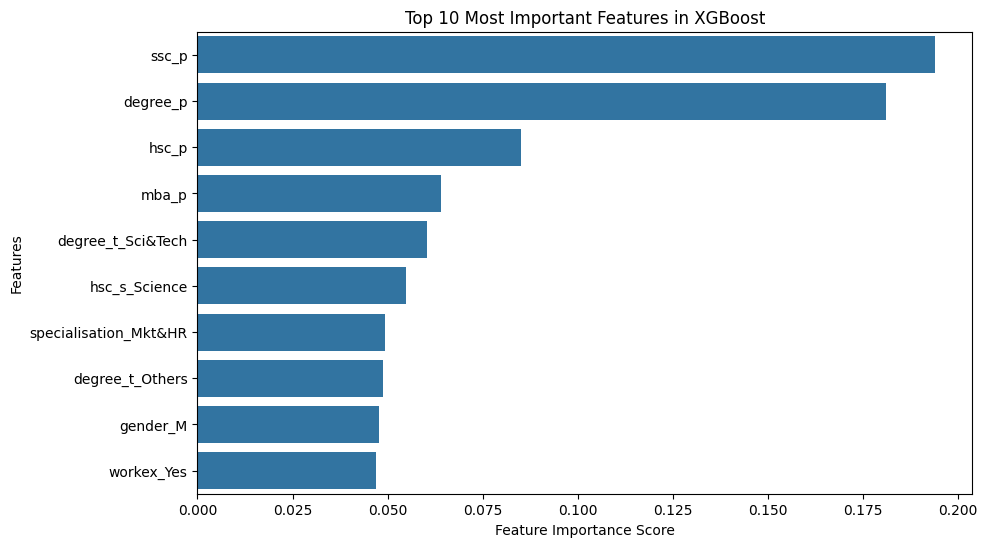

In [10]:
# 🎯 Define XGBoost hyperparameters

# 📋 Define a grid of hyperparameters to explore for tuning XGBoost
xgb_params = {
    "n_estimators": [100, 300, 500],  # Number of boosting rounds (trees)
    "max_depth": [3, 5, 7, 9],  # Maximum tree depth for base learners
    "learning_rate": [0.05, 0.1, 0.15],  # Step size shrinkage used in updates to prevent overfitting
    "subsample": [0.8, 1.0],  # Proportion of training data to use for each tree
    "colsample_bytree": [0.8, 1.0]  # Fraction of features to be used per tree
}

# 🧪 Set up and train XGBoost using GridSearchCV

# 📦 Create a GridSearchCV object using XGBClassifier with 5-fold cross-validation
# eval_metric="logloss" ensures that the model uses appropriate loss during training
xgb_cv = GridSearchCV(
    XGBClassifier(eval_metric="logloss"),  # XGBoost classifier with evaluation metric
    xgb_params,  # Parameter grid to search
    cv=5,  # Number of cross-validation folds
    scoring="accuracy"  # Metric used to evaluate models
)

# 🚀 Train the model using the training data
xgb_cv.fit(X_train, y_train)

# 📊 Get feature importance from the best XGBoost model

# Extract feature importance scores for each input feature
feature_importance = pd.Series(
    xgb_cv.best_estimator_.feature_importances_, index=X.columns
)

# 📈 Plot the top 10 most important features

# Create a bar plot of the top 10 features by importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x=feature_importance.nlargest(10),
    y=feature_importance.nlargest(10).index
)
plt.title("Top 10 Most Important Features in XGBoost")  # Title of the plot
plt.xlabel("Feature Importance Score")  # X-axis label
plt.ylabel("Features")  # Y-axis label
plt.show()  # Display the plot


### 🧪 6. Model Comparison with Multiple Classifiers
In this section, we compare multiple classification algorithms to see which performs best on our dataset. We:

_ **Check and handle missing values in the training and testing sets.**
_**Define multiple models: Logistic Regression, Decision Tree, Random Forest (tuned), XGBoost (tuned), and Support Vector Machine (SVM).**
_**Train and evaluate each model using accuracy score on the validation set.**
_**Compare performance and identify the best-performing model.**

This helps ensure our final prediction uses the most accurate algorithm for this dataset.


In [11]:
# 🔍 Step 1: Check for missing values in training features

# ✅ It's important to ensure there are no missing values in the training set before fitting models
print("🔍 Checking for NaN values in X_train:")
print(X_train.isnull().sum())  # Display count of missing values per column

# 🛠️ Step 2: Handle missing values

# 🧹 Fill missing values in both training and testing sets using the median of each column
# Median is used instead of mean to reduce the effect of outliers
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# ✅ Step 3: Confirm all missing values are handled

# Recheck the dataset to make sure no NaNs remain
print("✅ Missing values handled!")
print("🔍 Checking for NaN values after handling:")
print(X_train.isnull().sum())

# 🧠 Step 4: Define classification models for evaluation

# 🧰 Define a dictionary of models to evaluate
# Includes a mix of baseline models and tuned models from earlier steps
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Basic linear model for binary classification
    "Decision Tree": DecisionTreeClassifier(),                 # Nonlinear tree-based model
    "Random Forest": rf_cv.best_estimator_,                   # Tuned Random Forest from RandomizedSearchCV
    "XGBoost": xgb_cv.best_estimator_,                        # Tuned XGBoost from GridSearchCV
    "SVM": SVC()                                              # Support Vector Machine, good for complex boundaries
}

# 📊 Step 5: Train and evaluate each model

# 🧪 Initialize an empty dictionary to hold the accuracy results
results = {}

# 🔁 Loop through each model, train it, and evaluate its accuracy
for name, model in models.items():
    model.fit(X_train, y_train)                     # Train model on training data
    y_pred = model.predict(X_test)                  # Predict on test set
    accuracy = accuracy_score(y_test, y_pred)       # Calculate accuracy score
    results[name] = accuracy                        # Store model's accuracy in results dict
    print(f"📌 {name} Accuracy: {accuracy:.4f}")     # Display the model name and its accuracy

# 🏆 Step 6: Identify the best-performing model

# 🥇 Find the model with the highest accuracy
best_model = max(results, key=results.get)
print("\n🚀 Best Model:", best_model)  # Output the name of the top-performing model


🔍 Checking for NaN values in X_train:
ssc_p                    207
hsc_p                    207
degree_p                 207
etest_p                  207
mba_p                    207
gender_M                   0
ssc_b_Others               0
hsc_b_Others               0
hsc_s_Commerce             0
hsc_s_Science              0
degree_t_Others            0
degree_t_Sci&Tech          0
workex_Yes                 0
specialisation_Mkt&HR      0
dtype: int64
✅ Missing values handled!
🔍 Checking for NaN values after handling:
ssc_p                    0
hsc_p                    0
degree_p                 0
etest_p                  0
mba_p                    0
gender_M                 0
ssc_b_Others             0
hsc_b_Others             0
hsc_s_Commerce           0
hsc_s_Science            0
degree_t_Others          0
degree_t_Sci&Tech        0
workex_Yes               0
specialisation_Mkt&HR    0
dtype: int64
📌 Logistic Regression Accuracy: 0.8167
📌 Decision Tree Accuracy: 0.4967
📌 Random For

## 📦 6. Test Set Preparation and Prediction

This section prepares the test dataset to match the structure of the training data. It involves:
- Handling missing values
- One-hot encoding categorical features
- Creating interaction features and binned columns
- Scaling numerical data
- Aligning test columns with training features
- Making final predictions and saving them as a CSV for submission


In [12]:
# 🚀 1️⃣ Reload & Prepare Test Data

# 📥 Load the test dataset from CSV
test_df = pd.read_csv("test_campusrecruit.csv")

# 🆔 Store the test IDs separately (to be used later for submission or identification)
test_ids = test_df["id"]

# 🧹 Drop the 'id' column from test features as it’s not useful for prediction
test_df.drop(columns=["id"], errors="ignore", inplace=True)

# 🚀 2️⃣ Handle Missing Values

# 🩹 Fill missing numerical columns using the median values from the training dataset
for col in num_features:
    if col in test_df.columns and col in train_df.columns:
        test_df.loc[:, col] = test_df[col].fillna(train_df[col].median())

# 🧼 Fill missing categorical columns using the mode (most frequent value) from the training dataset
for col in cat_features:
    if col in test_df.columns and col in train_df.columns:
        test_df.loc[:, col] = test_df[col].fillna(train_df[col].mode()[0])

# 🚀 3️⃣ Encode & Feature Engineering

# 🧠 Apply One-Hot Encoding to categorical columns (only if they exist in test set)
# drop_first=True avoids the dummy variable trap
existing_cats = [col for col in ["ssc_b", "hsc_b", "hsc_s", "degree_t", "specialisation"] if col in test_df.columns]
if existing_cats:
    test_df = pd.get_dummies(test_df, columns=existing_cats, drop_first=True)

# 🔗 Create interaction features to capture relationships between performance indicators
if "ssc_p" in test_df.columns and "hsc_p" in test_df.columns:
    test_df["ssc_hsc_interaction"] = test_df["ssc_p"] * test_df["hsc_p"]
if "degree_p" in test_df.columns and "mba_p" in test_df.columns:
    test_df["degree_mba_interaction"] = test_df["degree_p"] * test_df["mba_p"]

# 📊 Bin score percentages into labeled performance categories
if "ssc_p" in test_df.columns:
    test_df["ssc_p_bin"] = pd.cut(test_df["ssc_p"], bins=[0, 40, 60, 80, 100], labels=["Low", "Average", "Good", "Excellent"])
if "hsc_p" in test_df.columns:
    test_df["hsc_p_bin"] = pd.cut(test_df["hsc_p"], bins=[0, 40, 60, 80, 100], labels=["Low", "Average", "Good", "Excellent"])

# 🧩 One-hot encode the new binned performance categories
bin_cols = [col for col in ["ssc_p_bin", "hsc_p_bin"] if col in test_df.columns]
if bin_cols:
    test_df = pd.get_dummies(test_df, columns=bin_cols, drop_first=True)


## ⚙️ 7. Final Scaling and Column Alignment

We scale the numerical features in the test data using the same `StandardScaler` from training. Then we align the test DataFrame columns to match exactly the training structure (`X_train.columns`).


In [13]:
# 🚀 4️⃣ Scale Numerical Features and Fix Missing Columns

# 🧾 Check if any expected numerical features are missing from the test set
missing_num_features = [col for col in num_features if col not in test_df.columns]
if missing_num_features:
    print(f"⚠️ Missing numerical features: {missing_num_features}")
    for col in missing_num_features:
        # 🩹 If a numerical feature is missing, fill it with the median value from the training set
        test_df[col] = train_df[col].median()

# ⚖️ Apply the same scaling (StandardScaler) used on the training data to the test numerical features
test_df[num_features] = scaler.transform(test_df[num_features])

# 🔍 Check for any features present in training set but missing in test set (often due to one-hot encoding)
missing_features = [col for col in X_train.columns if col not in test_df.columns]
if missing_features:
    print(f"⚠️ Missing features in test set: {missing_features}")
    for col in missing_features:
        # 🔧 Add missing one-hot encoded columns with default value 0
        if col in train_df.columns and train_df[col].dtype == "uint8":
            test_df[col] = 0
        # 🛠️ For numerical columns, fill with training set's median value
        elif col in train_df.columns and train_df[col].dtype in ["float64", "int64"]:
            test_df[col] = train_df[col].median()
        # 🧯 If column type is unclear or not from training, fill with 0 as fallback
        else:
            test_df[col] = 0

# ✅ Reorder and align test_df columns to match the training features (X_train)
# This ensures consistent feature order and structure for model prediction
test_df = test_df.reindex(columns=X_train.columns, fill_value=0)


⚠️ Missing features in test set: ['gender_M', 'workex_Yes']


## 📤 8. Predict and Save Submission

We use the best-performing model to generate predictions on the test dataset. These predictions are converted back to labels and saved in `submission7.csv`.


In [14]:
# 🚀 Final Prediction

# 🧠 Retrieve the best-performing model from earlier evaluation
final_model = models[best_model]

# 📈 Make predictions on the cleaned and processed test dataset
test_predictions = final_model.predict(test_df)

# 🗂️ Convert predictions into a submission DataFrame with 'id' and predicted 'status'
submission_df = pd.DataFrame({"id": test_ids, "status": test_predictions})

# 🔄 Convert numeric status back to readable labels for submission
submission_df["status"] = submission_df["status"].map({0: "Not Placed", 1: "Placed"})

# 💾 Save the submission file in CSV format for upload (e.g., Kaggle submission)
submission_df.to_csv("submission7.csv", index=False)

# 🖨️ Show a few sample predictions to verify output structure and correctness
print("✅ Sample Predictions:")
print(submission_df.head())

# 📦 Confirmation message indicating the file is ready for submission
print("\n✅ Submission file 'submission7.csv' is ready for Kaggle upload! 🚀")


✅ Sample Predictions:
    id      status
0  655      Placed
1  910      Placed
2  447      Placed
3  324  Not Placed
4  178      Placed

✅ Submission file 'submission7.csv' is ready for Kaggle upload! 🚀


-----------------------------------------


## 🎯 Salary Prediction Overview
In this section, we focus on predicting the salary of students who got placed. Since only placed students receive salaries, we first filter the data to include only them.


In [15]:
# 🧪 Only consider placed students (status = 1) for salary prediction

# 🎯 Filter the training data to include only students who got placed
# This is because salary prediction is only relevant for those who received job offers
placed_df = train_df[train_df["status"] == 1].copy()

# 🔍 Check missing salary values

# 💡 It's common for salary data to have missing entries; this helps assess how many need to be handled
print("Missing salary values:", placed_df["salary"].isnull().sum())  # Count of NaN values in 'salary' column


Missing salary values: 0


## 📊 Salary Distribution of Placed Students
We visualize the distribution of salaries to understand the range, skewness, and outliers in the dataset. This helps in selecting the right model for prediction.


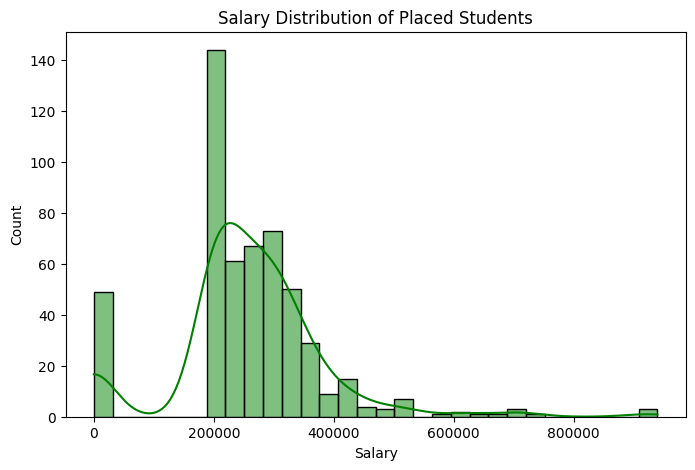

In [16]:
# 📊 Visualize salary distribution

# 🖼️ Create a figure with defined size for better readability
plt.figure(figsize=(8, 5))

# 📈 Plot the distribution of salaries for placed students using a histogram with KDE (smoothed curve)
sns.histplot(placed_df["salary"], bins=30, kde=True, color="green")

# 🏷️ Add plot title and axis labels for context
plt.title("Salary Distribution of Placed Students")  # Describes what the plot shows
plt.xlabel("Salary")  # X-axis shows salary ranges
plt.ylabel("Count")  # Y-axis shows number of students in each salary range

# 👁️ Display the plot
plt.show()


Most placed students earn between 200k and 400k, with a peak around 200k. The distribution is right-skewed, meaning a few students get much higher salaries.

## 🤖 Training the Salary Prediction Model
We use a **Random Forest Regressor** to predict the salary of placed students. The model is trained on academic and demographic features (excluding salary, ID, and placement status).


## 📦 Import Libraries

We'll begin by importing the necessary regression models and evaluation metrics used for salary prediction.


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## 🧪 Prepare Data for Salary Prediction

We’ll use only the placed students and extract features by removing columns not relevant to regression.


In [18]:
# 🎯 Select features and target for salary prediction

# Drop columns that are not useful for regression:
# - 'salary' is the target variable we're trying to predict
# - 'status' was used for classification, not needed here
# - 'id' is just an identifier and holds no predictive value
salary_features = placed_df.drop(columns=["salary", "status", "id"], errors="ignore")

# Set the target variable as the 'salary' column
salary_target = placed_df["salary"]

# ✂️ Split the dataset into training and testing sets (80% training, 20% testing)
# This helps evaluate model performance on unseen data
# random_state ensures reproducibility of the split
X_salary_train, X_salary_test, y_salary_train, y_salary_test = train_test_split(
    salary_features, salary_target, test_size=0.2, random_state=42
)


## 🌲 Train & Evaluate Random Forest Regressor

We’ll train a Random Forest model and evaluate it using RMSE and R² score.


In [19]:
# 🌲 Train Random Forest model

# Initialize the Random Forest Regressor with a fixed random seed for reproducibility
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data (features and target)
rf_model.fit(X_salary_train, y_salary_train)

# 🔮 Predict on test data

# Use the trained model to make salary predictions on the test set
rf_preds = rf_model.predict(X_salary_test)

# 📏 Evaluate performance

# Calculate Root Mean Squared Error (RMSE) – a common metric for regression
rf_rmse = round(np.sqrt(mean_squared_error(y_salary_test, rf_preds)), 2)

# Calculate R² Score – shows how much variance in salary is explained by the model
rf_r2 = round(r2_score(y_salary_test, rf_preds), 4)

# 🖨️ Print evaluation results
print("Random Forest Regressor:")
print(f"RMSE: {rf_rmse}")
print(f"R² Score: {rf_r2}")


Random Forest Regressor:
RMSE: 116399.41
R² Score: 0.171


## 📉 Train & Evaluate Linear Regression (Baseline)

We'll also try a linear regression model to serve as a baseline comparison.


The Linear Regression model performed slightly better than Random Forest, with a lower RMSE and a higher R² score. However, both models have low R² scores, meaning they don't explain salary variation well. This suggests that the dataset may be missing important features that affect salary.

In [20]:
# 📉 Train Linear Regression model (Baseline)

# Initialize the Linear Regression model
lin_model = LinearRegression()

# Fit the model to the training data
lin_model.fit(X_salary_train, y_salary_train)

# 🔮 Predict and evaluate

# Make salary predictions on the test set using the linear model
lin_preds = lin_model.predict(X_salary_test)

# Calculate Root Mean Squared Error (RMSE) to assess prediction error
lin_rmse = round(np.sqrt(mean_squared_error(y_salary_test, lin_preds)), 2)

# Calculate R² Score to see how much variance in salary is explained by the model
lin_r2 = round(r2_score(y_salary_test, lin_preds), 4)

# 🖨️ Print evaluation results
print("\nLinear Regression:")
print(f"RMSE: {lin_rmse}")
print(f"R² Score: {lin_r2}")



Linear Regression:
RMSE: 114982.01
R² Score: 0.1911


## 📊 Scatter Plot: Actual vs Predicted (Random Forest)

Let’s visualize the actual vs predicted salary values using a scatter plot to see how well predictions align.


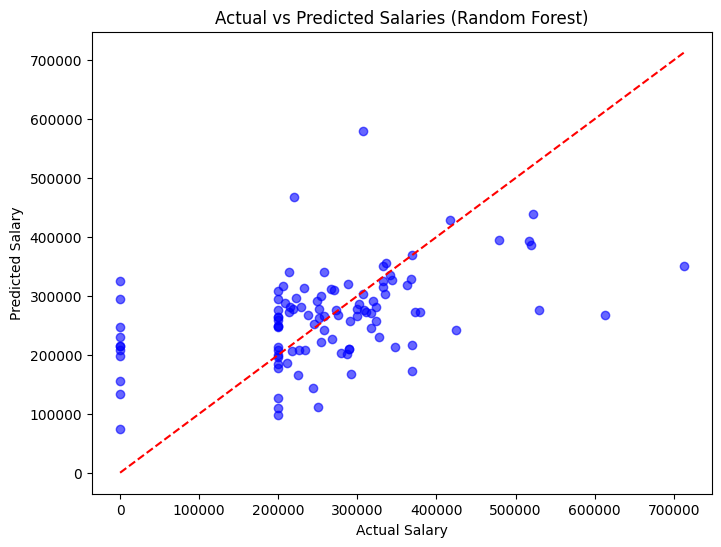

In [21]:
# 📊 Scatter Plot: Actual vs Predicted Salaries (Random Forest)

# Create a new figure with specified size for better visibility
plt.figure(figsize=(8, 6))

# Plot actual vs predicted salary values using a scatter plot
plt.scatter(y_salary_test, rf_preds, color="blue", alpha=0.6)  # Blue dots with slight transparency

# Add a reference line (diagonal) representing perfect prediction (y = x)
plt.plot([y_salary_test.min(), y_salary_test.max()],
         [y_salary_test.min(), y_salary_test.max()],
         'r--')  # Red dashed line for ideal predictions

# Label axes and add a title for context
plt.xlabel("Actual Salary")  # X-axis label
plt.ylabel("Predicted Salary")  # Y-axis label
plt.title("Actual vs Predicted Salaries (Random Forest)")  # Plot title

# Display the plot
plt.show()


This scatter plot compares the model's salary predictions to the actual values. The red dashed line represents a perfect prediction (y = x).  
- If the dots lie **close to the line**, the predictions are accurate.  
- If the dots are **scattered far**, the model has room for improvement.

## 📊 Bar Chart: Sample Comparison (Random Forest)

We'll compare actual vs predicted salaries side-by-side for the first 20 records using a bar chart.


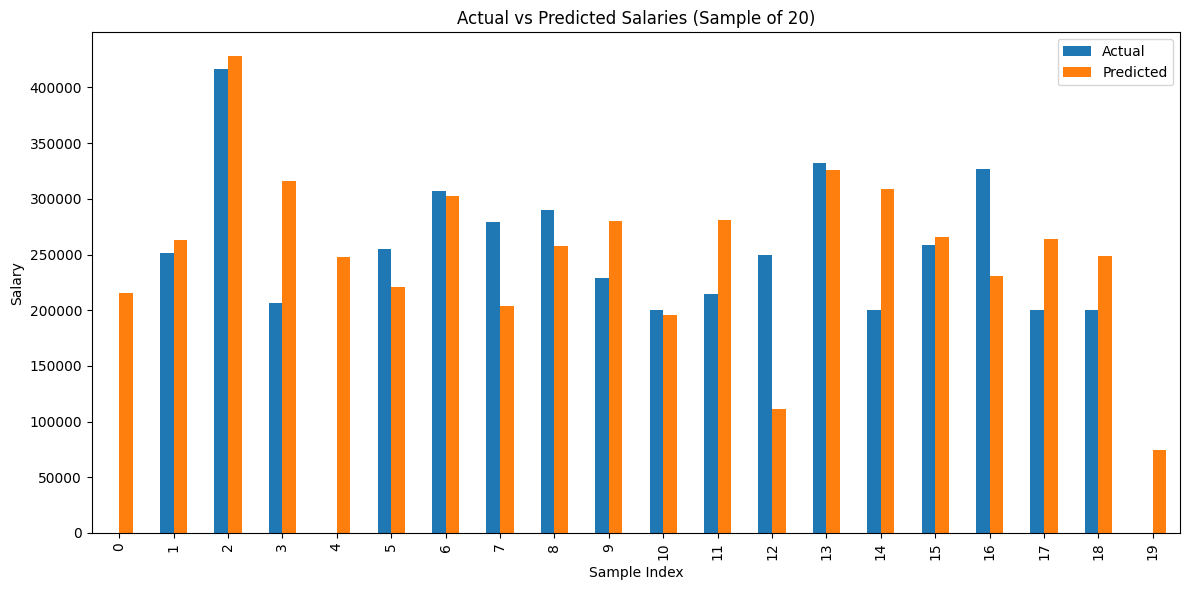

In [22]:
# 📊 Bar Plot: Actual vs Predicted Salaries (Sample of 20)

# Define how many records to display in the comparison (first 20 samples)
sample_count = 20

# Create a DataFrame comparing actual and predicted salary values
# Only take the first 20 predictions to keep the chart readable
comparison_df = pd.DataFrame({
    "Actual": y_salary_test.values[:sample_count],
    "Predicted": rf_preds[:sample_count]
}).reset_index(drop=True)  # Reset index for clean plotting

# Plot a bar chart comparing actual vs predicted salaries side by side
comparison_df.plot(kind="bar", figsize=(12, 6))  # Set a wider figure size for better spacing

# Add chart title and axis labels
plt.title("Actual vs Predicted Salaries (Sample of 20)")  # Title of the bar chart
plt.xlabel("Sample Index")  # X-axis shows the sample number
plt.ylabel("Salary")  # Y-axis shows salary value

# Add legend to differentiate actual vs predicted bars
plt.legend(["Actual", "Predicted"])

# Optimize layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()


## 📤 Export Predictions to CSV

Finally, we’ll save the actual vs predicted salaries into a CSV file for external use or reporting.


In [23]:
# 📤 Export Predictions to CSV

# Create a DataFrame containing actual and predicted salary values
salary_results = pd.DataFrame({
    "Actual_Salary": y_salary_test.values,      # Ground truth salaries
    "Predicted_Salary": rf_preds                # Predicted salaries from the model
})

# Export the DataFrame to a CSV file for further analysis or reporting
salary_results.to_csv("salary_predictions.csv", index=False)  # index=False avoids saving row numbers

# ✅ Confirmation message
print("Exported salary predictions to 'salary_predictions.csv'")


Exported salary predictions to 'salary_predictions.csv'


### 📊 Model Evaluation Summary

- The R² scores for both Random Forest and Linear Regression are quite low (≈ 0.17 to 0.19), indicating that the models are not capturing the variation in salary very well.
- This suggests that either important salary-related features are missing, or salary is hard to predict based on academic background alone.
- RMSE is over 100,000, meaning the average prediction error is significant. However, it's expected given the limited size and complexity of the dataset.


The plot shows a weak positive correlation between actual and predicted salaries. Most predictions are near the ideal line, but there’s some spread, especially at higher salaries. This suggests the model captures general trends but struggles with outliers.

---------------

### 🧠 Use of AI Tool (GenAI Policy Acknowledgment)

We used AI (ChatGPT by OpenAI) to fix some of our mistakes, help us clean our code, and give us ideas for how to better structure and present our work. It assisted us in writing comments, organizing the notebook into sections, and generating Markdown explanations. The AI helped improve clarity but did not do the work for us—we understood everything it suggested and took responsibility for the final results.

**Prompts used included:**
- “Add comments to this code like you were doing before”
- “Divide this code into pieces for ipynb and also do the mark downs”
- “Now do this and keep me on safe side, since it’s a school project”
- “Can you clean this code?” and similar requests during the debugging and editing process

We acknowledge that while the AI tool is helpful, its suggestions may not always be perfect and should be reviewed carefully. We made sure we understood the output ourselves, as required by the GenAI policy.
